In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")
df.sample(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
686,767-97-4650,B,Mandalay,Member,Female,Sports and travel,64.83,2,6.4830,136.1430,1/8/2019,11:59,Credit card,129.66,4.761905,6.4830,8.0
965,172-42-8274,B,Mandalay,Normal,Female,Electronic accessories,38.27,2,3.8270,80.3670,3/2/2019,18:18,Credit card,76.54,4.761905,3.8270,5.8
733,438-23-1242,B,Mandalay,Normal,Male,Electronic accessories,75.88,7,26.5580,557.7180,1/24/2019,10:38,Ewallet,531.16,4.761905,26.5580,8.9
515,413-20-6708,C,Naypyitaw,Member,Female,Fashion accessories,51.47,1,2.5735,54.0435,3/18/2019,15:52,Ewallet,51.47,4.761905,2.5735,8.5
442,138-17-5109,A,Yangon,Member,Female,Home and lifestyle,89.21,9,40.1445,843.0345,1/15/2019,15:42,Credit card,802.89,4.761905,40.1445,6.5
885,460-93-5834,A,Yangon,Normal,Male,Sports and travel,45.58,7,15.9530,335.0130,1/13/2019,10:03,Cash,319.06,4.761905,15.9530,5.0
26,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2/8/2019,15:31,Cash,33.52,4.761905,1.6760,6.7
884,548-48-3156,A,Yangon,Member,Female,Food and beverages,83.34,2,8.3340,175.0140,3/19/2019,13:37,Cash,166.68,4.761905,8.3340,7.6
683,105-10-6182,A,Yangon,Member,Male,Fashion accessories,21.48,2,2.1480,45.1080,2/27/2019,12:22,Ewallet,42.96,4.761905,2.1480,6.6
189,593-65-1552,C,Naypyitaw,Normal,Female,Home and lifestyle,69.81,4,13.9620,293.2020,1/28/2019,20:50,Credit card,279.24,4.761905,13.9620,5.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
#See if I have any null values
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
#See if I have any duplicate values
df.duplicated().any()

False

In [10]:
# change type for column Date
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Check the data type
df['Date'].dtype


dtype('<M8[ns]')

In [12]:
#the all columns 
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
# extract month name from column Date
df['Month Name'] = df['Date'].dt.strftime('%B')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,February


In [15]:
# Column arrangement
desired_order = ['Invoice ID', 'Date', 'Time', 'Month Name','Branch', 'Product line','City', 'Customer type', 'Gender', 'Payment',
        'Unit price', 'Quantity', 'Tax 5%', 'Total' ,
         'cogs', 'gross margin percentage', 'gross income',
       'Rating']

# Saving this arrange
df = df[desired_order]

In [ ]:
df.columns

Index(['Invoice ID', 'Date', 'Time', 'Month Name', 'Branch', 'Product line',
       'City', 'Customer type', 'Gender', 'Payment', 'Unit price', 'Quantity',
       'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [16]:
df.describe().round(2)

,Date,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2019-02-14 00:05:45.600000,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
min,2019-01-01 00:00:00,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,2019-01-24 00:00:00,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,2019-02-13 00:00:00,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,2019-03-08 00:00:00,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,2019-03-30 00:00:00,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00
std,NaN,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72


## calculate the outliers

In [ ]:
# Calculate the interquartile range (IQR) for Total Column 
IQR = 471.35 - 124.42
IQR

346.93

In [ ]:
# Define the lower and upper bounds for outliers
lower_bound = 346.93 - 1.5 * IQR
upper_bound = 346.93 + 1.5 * IQR

# Print The Result
print(f'The Lower Bound: {round(lower_bound, 2)} \nThe Upper Bound: {round(upper_bound, 2)}')



The Lower Bound: -173.46 
The Upper Bound: 867.33


In [ ]:
# Identify outliers
outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]
outliers.shape

(32, 18)

In [ ]:
# the data not have any lower bound
df[df['Total'] < lower_bound]

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating


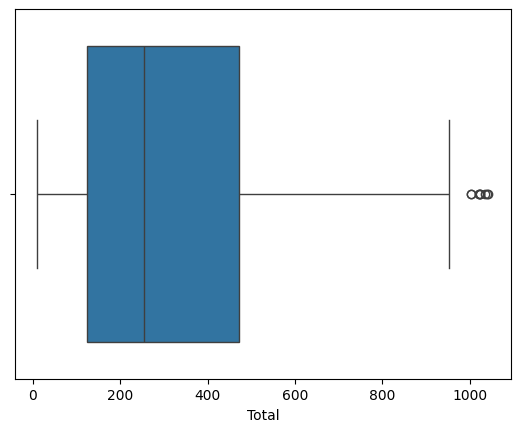

In [ ]:
sns.boxplot(x=df['Total'])

plt.show()

## Auditing accounts

In [40]:
#Rounding to two numbers
df['Tax 5%'] = df['Tax 5%'].round(2)

In [41]:
#Rounding to two numbers
df['Total'] = df['Total'].round(2)

In [42]:
#Rounding to one number
df['gross margin percentage'] = df['gross margin percentage'].round(1)

In [43]:
#Rounding to two numbers
df['gross income'] = df['gross income'].round(2)

In [58]:
# check COGS column if haveing any mistake

# Calculate the total amount
total_amount = df['Unit price'] * df['Quantity']

# Check if the calculated total amount is equal to the 'cogs' column
cogs_equal = total_amount.round(2) == df['cogs']

# Count the occurrences of True and False and reset the index
cogs_equal_counts = cogs_equal.value_counts().reset_index()

cogs_equal_counts


,index,count
0,True,1000


In [ ]:
# checking the total column calculation
Check_Total = (df['cogs'] + df['gross income']).round(2) == df['Total'].round(2)

# extract the result
Check_Total.value_counts().reset_index()

,index,count
0,True,981
1,False,19


In [19]:
# Calculate the total column
df['Total'] = df['cogs'] + df['gross income']

In [20]:
# checking the total column calculation
Check_Total = (df['cogs'] + df['gross income']).round(2) == df['Total'].round(2)

# extract the result
Check_Total.value_counts().reset_index()

,index,count
0,True,1000


In [48]:
# Calculate the extended price
extended_price = df['Unit price'] * df['Quantity']

# Calculate the tax amount
tax_amount = (extended_price * 0.05).round(2)

# Check if the calculated tax amount is equal to the 'Tax 5%' column
tax_equal = tax_amount == df['Tax 5%'].round(2)

# Extract in a logical value
tax_equal.value_counts().reset_index()

,index,count
0,True,985
1,False,15


In [49]:
# Calculate the Tax 5% column
df['Tax 5%'] = tax_amount

In [51]:
# check for new values
tax_equal = tax_amount == df['Tax 5%'].round(2)


tax_equal.value_counts().reset_index()

,index,count
0,True,1000


In [78]:
# Calculate the calculated gross margin percentage
calculated_gross_margin = round(((df['Total'] - df['cogs']) / df['Total']) * 100, 1)

# Check if the calculated gross margin percentage matches the 'gross margin percentage' column
is_gross_margin_correct = calculated_gross_margin == df['gross margin percentage']

# Count the occurrences of True and False and reset the index
is_gross_margin_correct.value_counts().reset_index()



,index,count
0,True,993
1,False,7


In [83]:
# seeing the missing values

df[round(((df['Total'] - df['cogs']) / df['Total']) * 100, 1) != df['gross margin percentage']]

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating


In [82]:
# Assign the calculated gross margin percentage to the 'gross margin percentage' column in the DataFrame

df['gross margin percentage'] = round(((df['Total'] - df['cogs']) / df['Total']) * 100, 1)

In [84]:
# check for new values

is_gross_margin_correct = calculated_gross_margin == df['gross margin percentage']

is_gross_margin_correct.value_counts().reset_index()

,index,count
0,True,1000


In [24]:
# selecting the numerical columns
selected_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

# Put it in a variable
subset_df = df[selected_columns]

# print the variable
round(subset_df.head(),2)




,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.14,548.97,522.83,4.76,26.14,9.1
1,15.28,5,3.82,80.22,76.40,4.76,3.82,9.6
2,46.33,7,16.22,340.53,324.31,4.76,16.22,7.4
3,58.22,8,23.29,489.05,465.76,4.76,23.29,8.4
4,86.31,7,30.21,634.38,604.17,4.76,30.21,5.3


In [93]:
# Check if 'Tax 5%' is equal to 'gross income'
is_tax_equal_to_gross_income = df['Tax 5%'] == df['gross income']

# Count the occurrences of True and False and reset the index
is_tax_equal_to_gross_income.value_counts().reset_index()

,index,count
0,True,985
1,False,15


In [92]:
# Identify rows where 'Tax 5%' is not equal to 'gross income'
df[df['Tax 5%'] != df['gross income']]

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
58,817-48-8732,2019-01-20,15:55,January,A,Home and lifestyle,Yangon,Member,Female,Cash,72.35,10,36.18,759.68,723.5,4.8,36.17,5.4
75,732-94-0499,2019-01-13,17:04,January,C,Electronic accessories,Naypyitaw,Normal,Female,Credit card,41.65,10,20.83,437.32,416.5,4.8,20.82,5.4
97,871-39-9221,2019-02-09,13:11,February,C,Electronic accessories,Naypyitaw,Normal,Female,Cash,12.45,6,3.73,78.44,74.7,4.8,3.74,4.1
109,861-77-0145,2019-03-03,14:30,March,C,Electronic accessories,Naypyitaw,Member,Male,Cash,81.97,10,40.99,860.68,819.7,4.8,40.98,9.2
144,239-10-7476,2019-01-21,16:37,January,A,Home and lifestyle,Yangon,Normal,Female,Ewallet,77.95,6,23.39,491.08,467.7,4.8,23.38,8.0
220,239-36-3640,2019-01-31,13:44,January,B,Electronic accessories,Mandalay,Normal,Male,Ewallet,45.35,6,13.61,285.71,272.1,4.8,13.60,6.1
238,346-84-3103,2019-03-02,19:26,March,B,Electronic accessories,Mandalay,Member,Female,Cash,13.22,5,3.31,69.40,66.1,4.8,3.30,4.3
356,632-90-0281,2019-03-08,20:01,March,C,Fashion accessories,Naypyitaw,Normal,Female,Credit card,37.55,10,18.78,394.28,375.5,4.8,18.77,9.3
444,301-11-9629,2019-01-15,10:43,January,A,Sports and travel,Yangon,Normal,Female,Cash,19.10,7,6.69,140.38,133.7,4.8,6.68,9.7
588,379-17-6588,2019-03-14,11:07,March,C,Fashion accessories,Naypyitaw,Normal,Male,Cash,59.61,10,29.81,625.90,596.1,4.8,29.80,5.3


In [94]:
# Assign the values from 'Tax 5%' to the 'gross income' column in the DataFrame
df['gross income'] = df['Tax 5%']

In [104]:
# checking again if there any missing values
df[df['Tax 5%'] != df['gross income']]

,Invoice ID,Date,Time,Month Name,Branch,Product line,City,Customer type,Gender,Payment,Unit price,Quantity,Tax 5%,Total,COGS,gross margin percentage,gross income,Rating


In [103]:
# rename the cogs name for being readable
df.rename(columns={'cogs' : 'COGS'}, inplace=True)


In [109]:
# saving the data in CSV file 
df.to_csv('SuperMarket_Sales.csv', index=False)
